## Supervised Learning of Neural Network
Before running this, run Preprocess.ipynb first

## import libraries

In [1]:
# r_seed = 119 # 119 is a good example
r_seed = 121 # 121 and 122 are good examples

import numpy as np
import tensorflow as tf
import random as rn

import os
os.environ['PYTHONHASHSEED'] = '0'
os.environ['KMP_DUPLICATE_LIB_OK']='True'

np.random.seed(r_seed)
rn.seed(r_seed)
tf.set_random_seed(r_seed)

session_conf = tf.ConfigProto(
    intra_op_parallelism_threads=1,
    inter_op_parallelism_threads=1
)

from keras import backend as K

sess = tf.Session(graph=tf.get_default_graph(), config=session_conf)
K.set_session(sess)

import pandas as pd
import csv
import json

from keras.models import Sequential
from keras.layers import Dense,Activation, Flatten
from keras.optimizers import RMSprop
from keras.optimizers import Adamax
from keras.callbacks import ModelCheckpoint
from keras import regularizers
from keras.models import model_from_json
from keras.utils import plot_model
from keras.utils import np_utils
from keras import initializers

# Local Import
import pyMAGIQ


Using TensorFlow backend.


## parameter in neural network

In [2]:
nunits = 40

nrate = 5
nfreq = 30
ndata = 4
ncomp = 2
epochs = 2
batch_size = 32

# number of bagging
# rounds = 1
# rounds = 5


## setting directories 

In [3]:
# frequency sets for USArray (Currently, this code works only with these frequencies)
freqsets = [  1.367187E-01, 1.093750E-01, 8.593753E-02, 6.640627E-02, 5.078124E-02, 3.906250E-02,
        3.027344E-02, 2.343750E-02, 1.855469E-02, 1.464844E-02, 1.171875E-02, 9.765625E-03,
        7.568361E-03, 5.859374E-03, 4.638671E-03, 3.662109E-03, 2.929688E-03, 2.441406E-03,
        1.892090E-03, 1.464844E-03, 1.159668E-03, 9.155271E-04, 7.324221E-04, 6.103516E-04,
        4.425049E-04, 3.204346E-04, 2.136230E-04, 1.373291E-04, 8.392331E-05, 5.340577E-05]

# number of frequency used in data
nfreq = len(freqsets)

datadir = '/Users/nimamura/Library/Mobile Documents/com~apple~CloudDocs/pyMAGIQ/pyMAGIQ/survey/USArray2019March'

# traindir    = datadir + '/train'
# X_trainpath = datadir + '/preprocessed/X_train.csv'
# y_trainpath = datadir + '/preprocessed/y_train.csv'
# rate_trainpath  = datadir + '/preprocessed/rate_train.csv'
# SiteIDpath  = datadir + '/preprocessed/siteID_train.csv'
# outputpath = datadir +'/outputs'

# # when using data augumentation
X_trainpath = datadir + '/preprocessed/X_train_aug.csv'
y_trainpath = datadir + '/preprocessed/y_train_aug.csv'
rate_trainpath  = datadir + '/preprocessed/rate_train_aug.csv'
SiteIDpath  = datadir + '/preprocessed/siteID_train_aug.csv'
outputpath = datadir +'/outputs'

## Loading X and y data in training datasets

In [4]:
df=pd.read_csv(X_trainpath, sep=',',header=None)
X_train = df.values

df=pd.read_csv(y_trainpath, sep=',',header=None)
y_train = df.values[:,0]

df=pd.read_csv(SiteIDpath, sep=',',header=None)
SiteID_train = df.values[:,0]

print(X_train.shape, y_train.shape, len(SiteID_train))
# convert class vectors to binary class matrices
y_train = np_utils.to_categorical(y_train, nrate)

(2750, 480) (2750,) 2750


## Now create machine learning model

In [5]:
# def neuralnet():
#     # regularization parameters
#     reg_val = 0.000001
#     reg_ker = 0.00003

#     initializers.Initializer()
#     initializers.RandomNormal(seed=r_seed)
    
#     # initialize model
#     model = Sequential()

#     # add layers
#     model.add(Dense( activation='relu', units=nunits,
#                      kernel_regularizer=regularizers.l1(reg_ker),
#                      input_dim=ndata*ncomp*nfreq*2))


#     model.add(Dense( activation='relu',
#                      kernel_regularizer=regularizers.l1(reg_val),
#                      units=nunits*3 ))

#     model.add(Dense( activation='relu',
#                      kernel_regularizer=regularizers.l1(reg_val),
#                      units=nunits*2 ))

#     model.add(Dense( activation='relu',
#                      kernel_regularizer=regularizers.l1(reg_val),
#                      units=nunits ))

#     model.add(Dense( activation='relu',
#                      kernel_regularizer=regularizers.l1(reg_val),
#                      units=int(nunits*0.8) ))

#     model.add(Dense( activation='relu',
#                      kernel_regularizer=regularizers.l1(reg_val),
#                      units=int(nunits*0.5) ))

#     model.add(Dense( activation='relu',
#                      kernel_regularizer=regularizers.l1(reg_val),
#                      units=int(nunits*0.25) ))

# #     model.add(Dense( activation='relu',
# #                      kernel_regularizer=regularizers.l1(reg_val),
# #                      units=nunits ))

#     model.add(Dense( activation='softmax', units=nrate,
#                      kernel_regularizer=regularizers.l1(reg_ker)))

#     return model


In [6]:
# sort X and y in random
# This is necessary for the validation_split as validation_split splits only tail part
X_random, y_random, SiteID_random, randindex = pyMAGIQ.utils.MAGIQlib.MAGIQlib.randomsortXY(X_train, y_train, SiteID_train)


In [6]:

# read model
model = neuralnet()

# setting optimization
model.compile(loss="categorical_crossentropy",
              optimizer=Adamax(),
              metrics=["accuracy"])

model.summary()
# learning parameters
history = model.fit(X_random, y_random, epochs=epochs,
                    validation_split=0.1, batch_size=batch_size)

val_acc = max(history.history['val_acc'])


NameError: name 'neuralnet' is not defined

## Plot convergence history

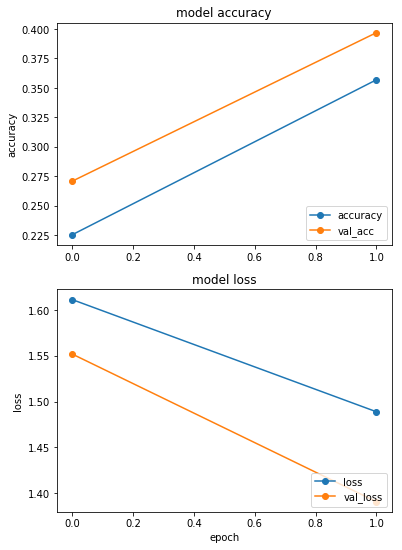

max val accuracy : 0.39692307692307693


In [8]:
pyMAGIQ.utils.MAGIQlib.MAGIQlib.plot_history(history,outputpath+'/acc_loss.eps')
print('max val accuracy :',max(history.history['val_acc']))


## Save model and weight

In [9]:
# plot_model returns error when using python 3, so commented out.
# save model in png file
# plot_model(model, to_file="model.png", show_shapes=True, show_layer_names=True)

# save model
model_json = model.to_json()
with open(outputpath+"/model.json",mode='w') as f:
    f.write(model_json)
    
# save weight
model.save_weights(outputpath+'/weights.hdf5')


## Load model and weight if you like

In [7]:
# read model
model = model_from_json(open(outputpath+'/model.json').read())

# read weights
model.load_weights(outputpath+'/weights.hdf5')


Instructions for updating:
Colocations handled automatically by placer.


## Human rating vs AI rating

In [8]:
# take validation model and rate
ndata_val = int(len(X_train)*0.1)
index_val = randindex[-ndata_val:-1]
Xval = X_random[-ndata_val:-1,:]
yval = y_random[-ndata_val:-1]
SiteIDval = SiteID_random[-ndata_val:-1]

# read model
model = model_from_json(open(outputpath+'/model.json').read())

# read weights
model.load_weights(outputpath+'/weights.hdf5')

model.summary()

# # setting optimization
# model.compile(loss="categorical_crossentropy",
#               optimizer=Adamax(),
#               metrics=["accuracy"])
#evaluate unrated
yval_est  = model.predict(Xval)


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 50)                24050     
_________________________________________________________________
dense_2 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_3 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_4 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_5 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_6 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_7 (Dense)              (None, 50)                2550      
__________

In [9]:
# for i in range(len(yval)):
#     grate = np.argmax( yval[i] ) + 1
#     prate = np.argmax( yval_est[i] ) + 1
    
#     print(SiteIDval[i], grate, prate)

[[46  1  3  0  0]
 [ 0 53 12  2  0]
 [ 1  4 29 12  2]
 [ 0  0  6 37 17]
 [ 1  0  1  3 44]]


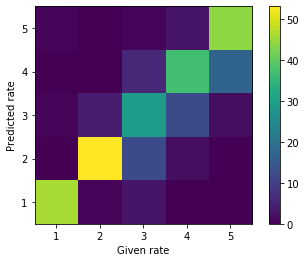

In [10]:
pyMAGIQ.utils.MAGIQlib.MAGIQlib.ratehistogram2d(yval_est,yval,5,fpath=outputpath+'/hist2d.eps')

## Set unrated data information

In [11]:
unrateddir       = datadir + '/unrated'
X_unratedpath    = datadir + '/preprocessed/X_unrated.csv'
y_unratedpath    = datadir + '/preprocessed/y_unrated.csv'
rate_unratedpath = datadir + '/preprocessed/rate_unrated.csv'
SiteIDpath_unrated = datadir + '/preprocessed/siteID_unrated.csv'

unratedlists = sorted( [f for f in os.listdir(unrateddir) if not f.startswith('.')] )

nMTunrated  = len(unratedlists)


## loading unrated data and initialize y for unrated

In [12]:
# read X_unrated
df=pd.read_csv(X_unratedpath, sep=',',header=None)
X_unrated = df.values

# load xml_unrated dict with pickle
try:
    import cPickle as pickle
except ImportError:  # python 3.x
    import pickle
    
with open(outputpath+'/xml_unrated.p', 'rb') as fp:
    xml_unrated = pickle.load(fp)


In [13]:

#evaluate unrated
y_unrated  = model.predict(X_unrated)
y_unrated = np.argmax(y_unrated,axis=1)
np.savetxt( y_unratedpath, y_unrated, fmt='%d', delimiter=',')

y_unrated = y_unrated.reshape(len(y_unrated))


## Plot rated Map Canada

/Users/nimamura/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/pyMAGIQ-0.0.1-py3.7.egg/pyMAGIQ/vis/plotUSmap.py:35: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
/Users/nimamura/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/pyMAGIQ-0.0.1-py3.7.egg/pyMAGIQ/vis/plotUSmap.py:38: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.


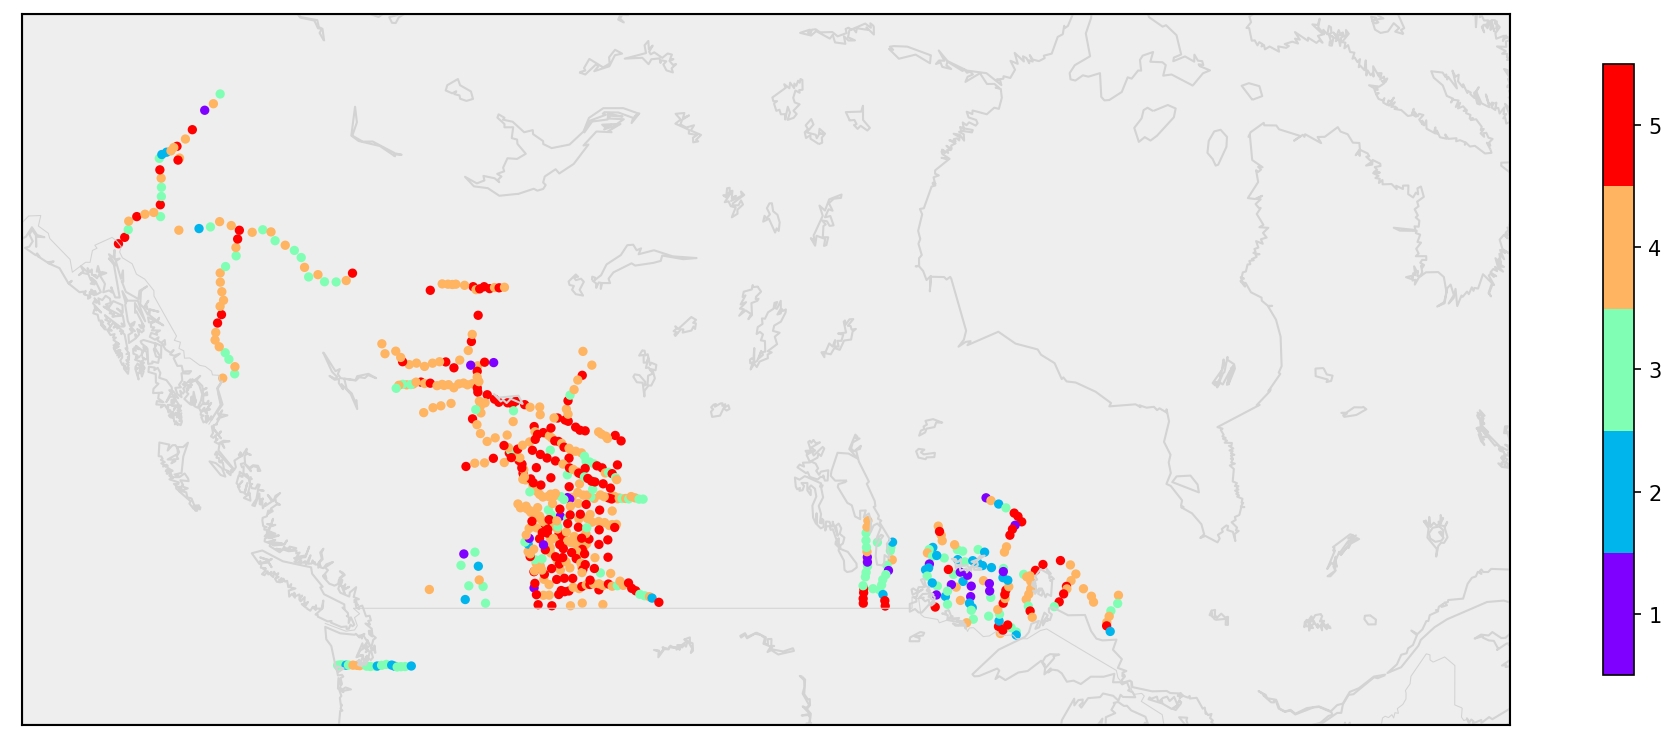

In [14]:
target = 'unrated'

xmin = -140
xmax = -65.0
ymin = 45.0
ymax = 65.0

latlist = []
lonlist = []


# read rate
ratelist = pyMAGIQ.utils.iofiles.io.read_rate_ytrain(y_unratedpath)

# read site ID
siteIDlist = pyMAGIQ.utils.iofiles.io.read_siteID(SiteIDpath_unrated)

for i in range(len(xml_unrated)):
    latlist.append(xml_unrated[i]['lat'])
    lonlist.append(xml_unrated[i]['lon'])

fname = outputpath+'/imageCanada.eps'
pyMAGIQ.vis.plotUSmap.plotMap(datadir,xmin,xmax,ymin,ymax,latlist,lonlist,ratelist,fname)



In [15]:
for i in range(1,6):
    print(i, ' number of index ',ratelist.count(i))
# ratelist.index(3)

1  number of index  25
2  number of index  35
3  number of index  116
4  number of index  270
5  number of index  180


## Plot apparent resisitivies and its rate

In [16]:
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt

#************************************************************************/
def plot_Z(alldata,targetSiteID,fpath):

    fig = plt.figure(figsize=(14,12))
    outer = gridspec.GridSpec(3, 3, wspace=0.2, hspace=0.2)

    for i in range(9):
        inner = gridspec.GridSpecFromSubplotSpec(2, 1,
                subplot_spec=outer[i], wspace=0.1, hspace=0.1)

        # target Site ID name
        target = targetSiteID[i]

        # read variable
        Zapp_xy     = alldata[target]['Zapp_xy']
        Zapp_err_xy = alldata[target]['Zapp_err_xy']
        Zphs_xy     = alldata[target]['Zphs_xy']
        Zphs_err_xy = alldata[target]['Zphs_err_xy']

        Zapp_yx     = alldata[target]['Zapp_yx']
        Zapp_err_yx = alldata[target]['Zapp_err_yx']
        Zphs_yx     = alldata[target]['Zphs_yx']
        Zphs_err_yx = alldata[target]['Zphs_err_yx']

        period      = alldata[target]['period']
        prate       = alldata[target]['prate']
        if 'grate' in alldata[target].keys():
            grate   = alldata[target]['grate']
            title_str = chr(97+i) + ') Pred Rate: ' + str(prate) + '  Given Rate: ' + str(grate)
        else:
            title_str = chr(97+i) + ') Pred Rate: ' + str(prate)


        for j in range(2):
            ax = plt.Subplot(fig, inner[j])
            ax.grid()
            if j == 0:
                ax.set_title(title_str)
                ax.errorbar(period, Zapp_xy, yerr=Zapp_err_xy, fmt='o', mfc='none', capsize=4, label='xy')
                ax.errorbar(period, Zapp_yx, yerr=Zapp_err_yx, fmt='o', mfc='none', capsize=4, label='yx', c='r')
                ax.set_xscale('log')
                ax.set_yscale('log')
                ax.set_xlim([1.E-0,1.E+5])
                plt.setp(ax.get_xticklabels(), visible=False)
                if i ==0 or i==3 or i== 6:
                    ax.set_ylabel("App. Res.")

            else:
                ax.errorbar(period,Zphs_xy,yerr=Zphs_err_xy,fmt='o',mfc='none',capsize=4)
                ax.errorbar(period,Zphs_yx,yerr=Zphs_err_yx,fmt='o',mfc='none',capsize=4,c='r')
                ax.set_xscale('log')
                ax.set_xlim([1.E-0,1.E+5])
                ax.set_ylim([0,90])
                ax.set_yticks([0,30,60,90])
                if i ==0 or i==3 or i== 6:
                    ax.set_ylabel("Phase")
                
                if i >5:
                    ax.set_xlabel("Period (sec)")
                # ax.grid()

            fig.add_subplot(ax)

    plt.savefig(fpath,format='eps')
    plt.show()

MT_TF_Lithoprobe.SNO323.1999
Use Hx orientation as a declination angle, instead of original declination
reading Z.VAR
MT_TF_UofAlberta.sa175.2010
reading Z.VAR
MT_TF_Lithoprobe.WST139.1998
reading Z.VAR
MT_TF_Lithoprobe.ABT310.1993-1996
reading Z.VAR
MT_TF_Lithoprobe.ABT301.1993-1996
reading Z.VAR
MT_TF_Lithoprobe.ABT006.1993-1996
reading Z.VAR
MT_TF_UofAlberta.bc310.2009
reading Z.VAR
MT_TF_Lithoprobe.WST004.1998
reading Z.VAR
MT_TF_CAFE-MT.CAF11.2010
Use Hx orientation as a declination angle, instead of original declination
reading Z.INVSIGCOV


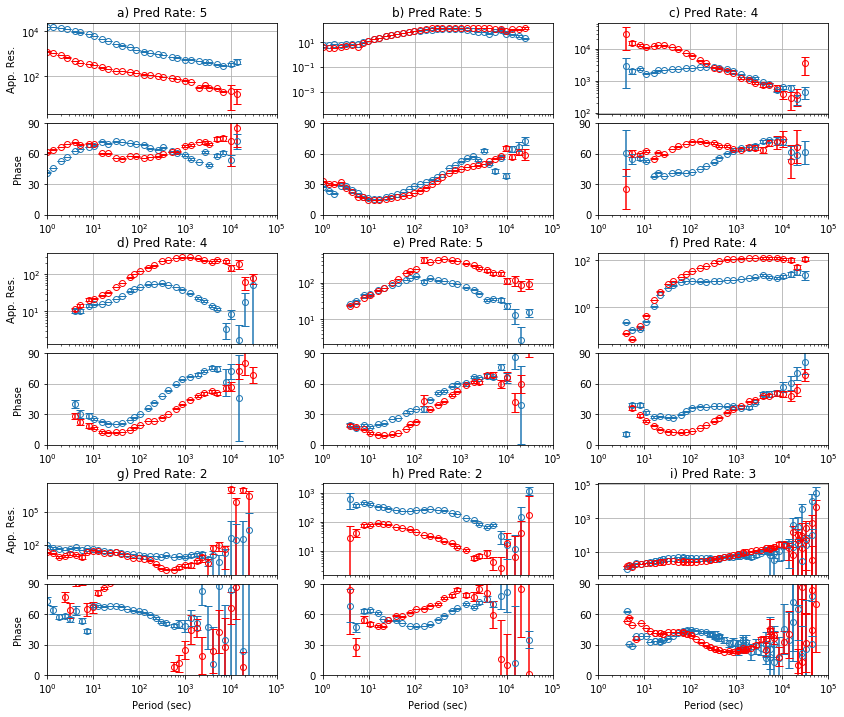

In [17]:
# ID list to plot
# Change this list as you like
targetSiteID_unrated = ['MT_TF_Lithoprobe.SNO323.1999',
                'MT_TF_UofAlberta.sa175.2010',
                'MT_TF_Lithoprobe.WST139.1998',
                'MT_TF_Lithoprobe.ABT310.1993-1996',
                'MT_TF_Lithoprobe.ABT301.1993-1996',
                'MT_TF_Lithoprobe.ABT006.1993-1996',
                'MT_TF_UofAlberta.bc310.2009',
                'MT_TF_Lithoprobe.WST004.1998',
                'MT_TF_CAFE-MT.CAF11.2010' ]

target = 'unrated'

alldata = {}

# read rate
ratelist = pyMAGIQ.utils.iofiles.io.read_rate_ytrain(y_unratedpath)

# change variable name
targetSiteID = targetSiteID_unrated

siteIDlist = pyMAGIQ.utils.iofiles.io.read_siteID(SiteIDpath_unrated)

for i in range(len(targetSiteID)):
    print( targetSiteID[i] )
    # initialize dictionary for current MT site
    alldata[targetSiteID[i]] = {}
    siteIndex = siteIDlist.index( targetSiteID[i] )

    MTdir = datadir + '/' + target + '/' + targetSiteID[i]

    # filename of xml
    XMLlist = sorted( [f for f in os.listdir(MTdir) if f.endswith('xml')] )

    # path to xml and edi file
    XMLpath = MTdir + '/' + XMLlist[0]

    period, xmldata, Zapp, Zapp_err, Zphs, Zphs_err, _ = pyMAGIQ.utils.iofiles.io.readXML(XMLpath,True)

    prate = ratelist[siteIndex]

    Zapp2 = Zapp[:,1:2].flatten().tolist()
    Zapp_err2 = Zapp_err[:,1:2].flatten().tolist()
    Zphs2 = Zphs[:,1:2].flatten().tolist()
    Zphs_err2 = Zphs_err[:,1:2].flatten().tolist()

    Zapp3 = Zapp[:,2:3].flatten().tolist()
    Zapp_err3 = Zapp_err[:,2:3].flatten().tolist()
    Zphs3 = Zphs[:,2:3].flatten().tolist()
    Zphs_err3 = Zphs_err[:,2:3].flatten().tolist()

    alldata[targetSiteID[i]]['Zapp_xy']     = Zapp2
    alldata[targetSiteID[i]]['Zapp_err_xy'] = Zapp_err2
    alldata[targetSiteID[i]]['Zphs_xy']     = Zphs2
    alldata[targetSiteID[i]]['Zphs_err_xy'] = Zphs_err2

    alldata[targetSiteID[i]]['Zapp_yx']     = Zapp3
    alldata[targetSiteID[i]]['Zapp_err_yx'] = Zapp_err3
    alldata[targetSiteID[i]]['Zphs_yx']     = Zphs3
    alldata[targetSiteID[i]]['Zphs_err_yx'] = Zphs_err3

    alldata[targetSiteID[i]]['period']      = period
    alldata[targetSiteID[i]]['prate']       = prate

plot_Z(alldata,targetSiteID,outputpath+'/Appres.eps')


1_MT_TF_USArray.KYT47.2014
reading Z.INVSIGCOV
2_MT_TF_USArray.NDD30.2017
reading Z.INVSIGCOV
3_MT_TF_USArray.COO26.2018
reading Z.INVSIGCOV
4_MT_TF_USArray.WIG39.2011
reading Z.INVSIGCOV
5_MT_TF_USArray.TNU49.2014
reading Z.INVSIGCOV
6_MT_TF_USArray.IDD11.2007
reading Z.INVSIGCOV
7_MT_TF_USArray.MND37.2011
reading Z.INVSIGCOV
8_MT_TF_USArray.SCX58.2015
reading Z.INVSIGCOV
9_MT_TF_USArray.NCT54.2015
reading Z.INVSIGCOV
5 5
5 5
5 4
4 4
3 4
3 3
3 2
2 3
1 1


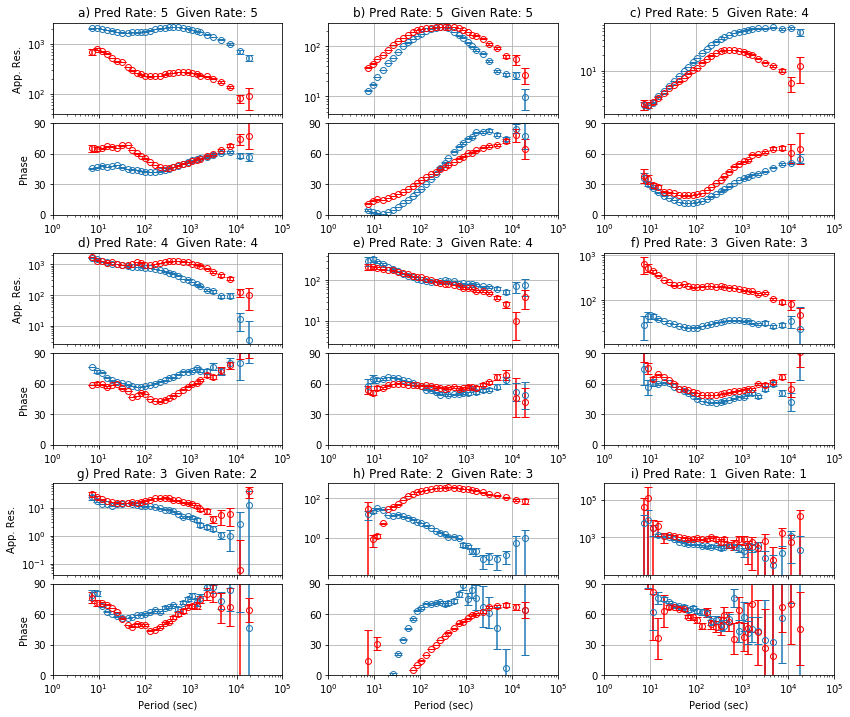

In [19]:
XMLvaldir = datadir + '/validation'
# list in training directory and test directory
vallists = sorted( [f for f in os.listdir(XMLvaldir) if not f.startswith('.')] )

# Make XML list from xml files
xml_val, SiteID_val = pyMAGIQ.utils.iofiles.io.get_XMLlists(nfreq,XMLvaldir,vallists,freqsets)

# read X (input data) and y (output data: rate) from XML files 
y_val, rate_val, Zapplist, Zapp_errlist, Zphslist, Zphs_errlist = pyMAGIQ.utils.MAGIQlib.MAGIQlib.xml2Z(xml_val,SiteID_val,nfreq,Rotate=False,freq_interp=freqsets)

X_val = pyMAGIQ.utils.MAGIQlib.MAGIQlib.getXfromZ(Zapplist, Zapp_errlist, Zphslist, Zphs_errlist, nfreq, SiteID_val)

# reshape X_train to 2-D array
X_val = X_val.reshape(len(X_val),nfreq*ndata*ncomp*2).astype('float32')

# predict X_val
y_val_est = model.predict(X_val)
y_val_est = np.argmax( y_val_est,axis=1 )

targetSiteID = []
alldata = {}
for i in range(len(vallists)):
    SiteID = vallists[i]
    targetSiteID.append( SiteID )
    prate = y_val_est[i]+1
    grate = y_val[i]+1
    
    Zapp2 = Zapplist[i,:,1:2].flatten().tolist()
    Zapp_err2 = Zapp_errlist[i,:,1:2].flatten().tolist()
    Zphs2 = Zphslist[i,:,1:2].flatten().tolist()
    Zphs_err2 = Zphs_errlist[i,:,1:2].flatten().tolist()
    
    Zapp3 = Zapplist[i,:,2:3].flatten().tolist()
    Zapp_err3 = Zapp_errlist[i,:,2:3].flatten().tolist()
    Zphs3 = Zphslist[i,:,2:3].flatten().tolist()
    Zphs_err3 = Zphs_errlist[i,:,2:3].flatten().tolist()
    
    alldata[SiteID] = {}
    alldata[SiteID]['Zapp_xy']     = Zapp2
    alldata[SiteID]['Zapp_err_xy'] = Zapp_err2
    alldata[SiteID]['Zphs_xy']     = Zphs2
    alldata[SiteID]['Zphs_err_xy'] = Zphs_err2

    alldata[SiteID]['Zapp_yx']     = Zapp3
    alldata[SiteID]['Zapp_err_yx'] = Zapp_err3
    alldata[SiteID]['Zphs_yx']     = Zphs3
    alldata[SiteID]['Zphs_err_yx'] = Zphs_err3
    
    alldata[SiteID]['period']      = xml_val[i]['period']
    alldata[SiteID]['prate']       = prate
    alldata[SiteID]['grate']       = grate  
    
    print(prate,grate)

plot_Z(alldata,targetSiteID,outputpath+'/AppRes_val.eps')


In [20]:
for i in range(len(index_val)):
    index = index_val[i]
#     print(i, np.argmax(yval[i])+1)
    grate = np.argmax( yval[i] ) + 1
    prate = np.argmax( yval_est[i] ) + 1
    print(i, 'grate', grate, 'prate',prate)

0 grate 4 prate 5
1 grate 2 prate 2
2 grate 4 prate 3
3 grate 4 prate 3
4 grate 3 prate 2
5 grate 2 prate 2
6 grate 3 prate 3
7 grate 4 prate 3
8 grate 2 prate 2
9 grate 5 prate 5
10 grate 4 prate 4
11 grate 1 prate 1
12 grate 5 prate 5
13 grate 3 prate 3
14 grate 1 prate 1
15 grate 2 prate 2
16 grate 1 prate 1
17 grate 3 prate 3
18 grate 3 prate 1
19 grate 5 prate 5
20 grate 3 prate 3
21 grate 5 prate 5
22 grate 4 prate 2
23 grate 3 prate 3
24 grate 2 prate 2
25 grate 5 prate 5
26 grate 2 prate 2
27 grate 4 prate 4
28 grate 5 prate 4
29 grate 2 prate 2
30 grate 1 prate 1
31 grate 2 prate 2
32 grate 2 prate 2
33 grate 5 prate 4
34 grate 4 prate 4
35 grate 5 prate 4
36 grate 2 prate 3
37 grate 3 prate 2
38 grate 3 prate 3
39 grate 5 prate 5
40 grate 1 prate 1
41 grate 5 prate 5
42 grate 1 prate 1
43 grate 4 prate 4
44 grate 2 prate 2
45 grate 3 prate 1
46 grate 4 prate 4
47 grate 1 prate 1
48 grate 3 prate 3
49 grate 1 prate 1
50 grate 1 prate 1
51 grate 4 prate 4
52 grate 4 prate 4
53 

## Sensitivity analysis

In [21]:
XMLsensdir = datadir + '/sensitivity'
# list in training directory and test directory
senslists = sorted( [f for f in os.listdir(XMLsensdir) if not f.startswith('.')] )

# Make XML list from xml files
xml_sens, SiteID_sens = pyMAGIQ.utils.iofiles.io.get_XMLlists(nfreq,XMLsensdir,senslists,freqsets)

# read X (input data) and y (output data: rate) from XML files 
y_sens, rate_sens, Zapplist, Zapp_errlist, Zphslist, Zphs_errlist = pyMAGIQ.utils.MAGIQlib.MAGIQlib.xml2Z(xml_sens,SiteID_sens,nfreq,Rotate=True,freq_interp=freqsets)

X_sens = pyMAGIQ.utils.MAGIQlib.MAGIQlib.getXfromZ(Zapplist, Zapp_errlist, Zphslist, Zphs_errlist, nfreq, SiteID_sens)

# reshape X_train to 2-D array
X_sens = X_sens.reshape(len(X_sens),nfreq*ndata*ncomp*2).astype('float32')

# predict X_val
y_sens_est = model.predict(X_sens)
y_sens_est = np.argmax( y_sens_est,axis=1 )

X_ori = X_sens


1_MT_TF_USArray.CAM06.2010
reading Z.INVSIGCOV
2_MT_TF_USArray.ILN41.2012
reading Z.INVSIGCOV


In [22]:
# model changing rate (5%)
delta = 0.02

# initialize dfdx
dfdx = np.zeros(np.shape(X_sens),dtype=np.float32)
rel_score = np.zeros(np.shape(X_sens),dtype=np.float32)

# read model
model = model_from_json(open(outputpath+'/model.json').read())
# read weights
model.load_weights(outputpath+'/weights.hdf5')

for n in range(len(senslists)):
#     print('rate[n]',rate[n])
    y_current = y_sens[n]
    print('Rating ', y_current+1)
    for i in range(np.shape(X_sens)[1]):

        #################################
        # forward difference
        X_diff = X_sens[n,].reshape(1,nfreq*ndata*ncomp*2)
        X_diff[0,i] = X_diff[0,i]*(1.0+delta)

        # Apply X_sens to model
        #evaluate unrated
        yval_fwd  = model.predict(X_diff)
#         print('yval_fwd',yval_fwd)

        #################################
        # backward difference
        X_diff = X_sens[n,].reshape(1,nfreq*ndata*ncomp*2)
        X_diff[0,i] = X_diff[0,i]*(1.0-delta)

        # Apply X_sens to model
        #evaluate unrated
        yval_bwd  = model.predict(X_diff)
#         print('yval_bwd',yval_bwd)

#         print('fwd-bwd',yval_fwd[0,Rating] ,yval_bwd[0,Rating] )
        dfdx[n,i] = (yval_fwd[0,y_current] - yval_bwd[0,y_current]) / (X_diff[0,i]*delta*2.0)
        rel_score[n,i] = dfdx[n,i] **2.0
    
rel_score_reshape = rel_score.reshape(len(senslists),nfreq,ndata*ncomp*2).astype('float32')

Rating  3
Rating  5


In [ ]:
# 
plt.figure(figsize=(18,12))

for n in range(len(senslists)):
# for n in range(2):
    period = xml_sens[n]['period']
    score = rel_score_reshape[n,:,:]
    for i in range(ndata*2):
        if i%2 == 0:
            comp = '(xy)'
        else:
            comp = '(yx)'

        if i == 0:
            title = 'Apparent resistivity'
        elif i == 1:
            title = 'Phase'
        elif i == 2:
            title = 'Error bar of apparent resistivity'
        elif i == 3:
            title = 'Error bar of phase'
        elif i == 4:
            title = 'Continuity of apparent resistivity'
        elif i == 5:
            title = 'Continuity of phase'
        elif i == 6:
            title = 'Continuity of error bar of apparent resitivity'
        elif i == 7:
            title = 'Continuity of error bar of phase'


        plt.subplot(len(senslists)*2,4,i+1+n*8)

        plt.semilogx(period,score[:,0+2*i],label='xy')
        plt.semilogx(period,score[:,1+2*i],label='yx',c='r')
        plt.tight_layout()
        plt.title(title)
        plt.xlim([1.E-0,1.E+5])

#         plt.ticklabel_format(style="sci",  axis="y",scilimits=(0,0))
#         plt.semilogx(period,rel_score_reshape[0,:,0+2*i],label='xy')
#         plt.semilogx(period,rel_score_reshape[0,:,1+2*i],label='yx')

        if n == 0 and i<4:
            plt.legend()

            
        if n == len(senslists)-1 and i>3:
            plt.xlabel('Period (sec)')

plt.savefig(outputpath+'/sens_analy.eps',format='eps')
plt.show()


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


## averaged sensitivity analysis of all resutls

In [32]:
len(SiteID_train)

1115